# added spacial variance

# 1. N_particles = 10000

# 2. The time step was reduced from 100 [min] to 10 [min]. maybe that is causing the riple in y-direction moments. 

### The simulation was run with only one seed for the random generator.

In [1]:
import particles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
import scipy

In [2]:
from scipy import stats

In [3]:
%matplotlib inline

In [4]:
plt.rcParams['figure.figsize'] = (20, 15)

In [5]:
files = ["./data/test_250_nm.txt", 
         "./data/test_500_nm.txt", 
         "./data/test_750_nm.txt",
         "./data/test_1000_nm.txt",
         "./data/test_1250_nm.txt",
         "./data/test_1500_nm.txt",
         "./data/test_1750_nm.txt",
         "./data/test_2000_nm.txt"]

### the end of the media

In [6]:
L = 120 #mm

### particle diameter range [nm]

In [53]:
d =range(250,2250,250)
print(d)

[250, 500, 750, 1000, 1250, 1500, 1750, 2000]


In [8]:
def mom(n, position, time, m0):
    n=n
    mn = np.zeros(time.shape[0])
    for i in range(position.shape[1]):
        if m0[i]==0:
            print("no more particles in the media for moment_{1} [m^{1}] @ time = {0} [min]".format(time[i],n))
            print("")
            break
        else:
            mn[i] = np.sum(position[i]**n)/m0[i]
    return mn

In [9]:
mom1x = []
mom1y = []
mom2x = []
mom2y = []
v_p= []
for f in files[:]:
    print(f)
    p = particles.Particles(f, dimension=2, time_start=0, time_end=20000, time_step=10)
    m0 = []
    for i in range(p.qx.shape[1]):
        x_data = p.qx[i]
        # count particles in media that are before the outlet of the mesh
        particles_in_media = ((x_data>=0) & (x_data !=np.nan) & (x_data<=120)).sum()
        m0.append(particles_in_media)
    m1x = mom(n=1,position=p.qx,time=p.time, m0=m0)
    m1y = mom(n=1,position=p.qy,time=p.time, m0=m0)
    m2x = mom(n=2,position=p.qx,time=p.time, m0=m0)
    m2y = mom(n=2,position=p.qy,time=p.time, m0=m0)
    mom1x.append(m1x)
    mom1y.append(m1y)
    mom2x.append(m2x)
    mom2y.append(m2y)

./data/test_250_nm.txt
no more particles in the media for moment_1 [m^1] @ time = 10780 [min]

no more particles in the media for moment_1 [m^1] @ time = 10780 [min]

no more particles in the media for moment_2 [m^2] @ time = 10780 [min]

no more particles in the media for moment_2 [m^2] @ time = 10780 [min]

./data/test_500_nm.txt
no more particles in the media for moment_1 [m^1] @ time = 6680 [min]

no more particles in the media for moment_1 [m^1] @ time = 6680 [min]

no more particles in the media for moment_2 [m^2] @ time = 6680 [min]

no more particles in the media for moment_2 [m^2] @ time = 6680 [min]

./data/test_750_nm.txt
no more particles in the media for moment_1 [m^1] @ time = 13340 [min]

no more particles in the media for moment_1 [m^1] @ time = 13340 [min]

no more particles in the media for moment_2 [m^2] @ time = 13340 [min]

no more particles in the media for moment_2 [m^2] @ time = 13340 [min]

./data/test_1000_nm.txt
no more particles in the media for moment_1 [m^

# Plot the zero-moment (particles in media)

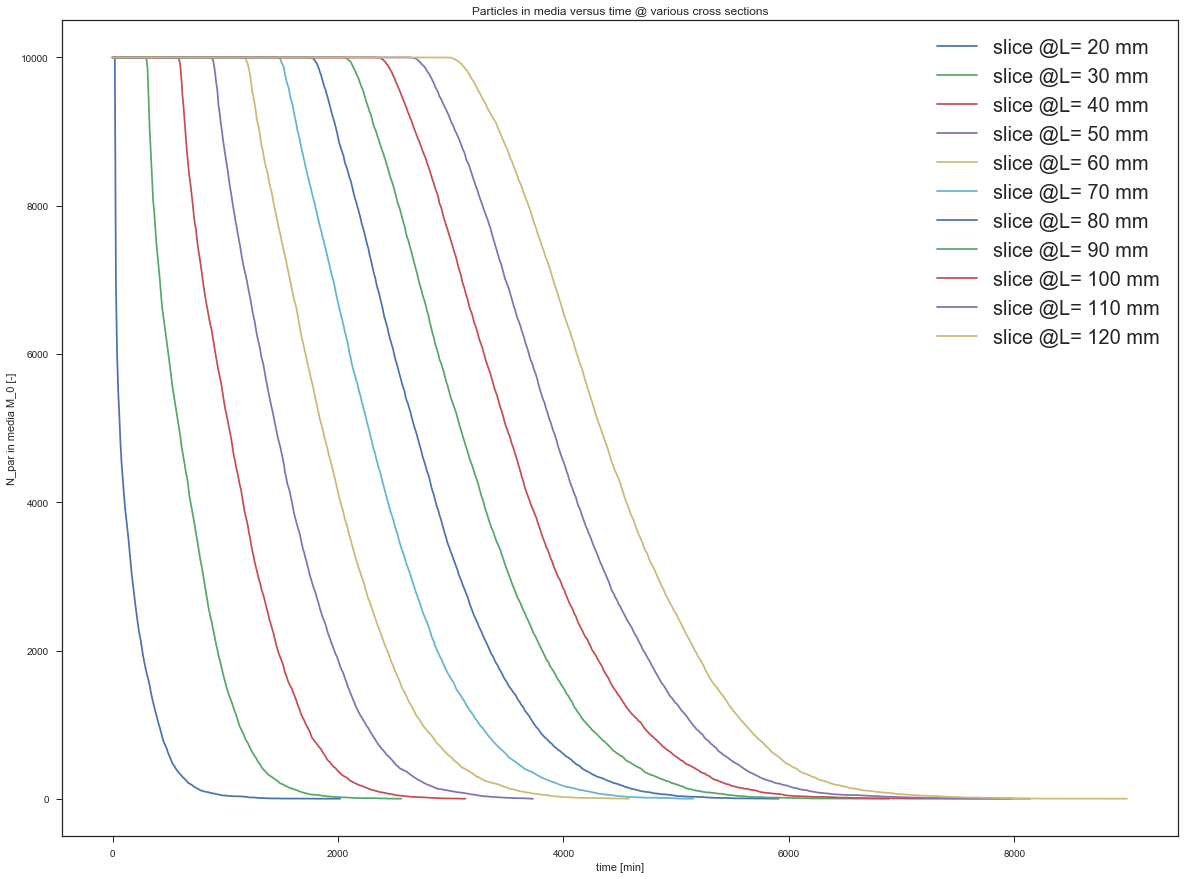

In [10]:
time = []
for l in range(20,130,10):
    m0 = []
    for i in range(p.qx.shape[1]):
        x_data = p.qx[i]
        c = ((x_data>0) & (x_data !=np.nan) & (x_data <=l)).sum()
        m0.append(c)
    m = pd.DataFrame(m0)
    m.index = p.time
    m_ = m[m[0]>1] # more that one particle in the media. 
    plt.plot(m_, label="slice @L= {0} mm".format(l))
plt.title("Particles in media versus time @ various cross sections")
plt.xlabel("time [min]")
plt.ylabel("N_par in media M_0 [-]")
plt.legend(fontsize=20)

## The number of particles in the media drops down to 1 particle after 5000-6000 min.

### plot particle velocity ratios.

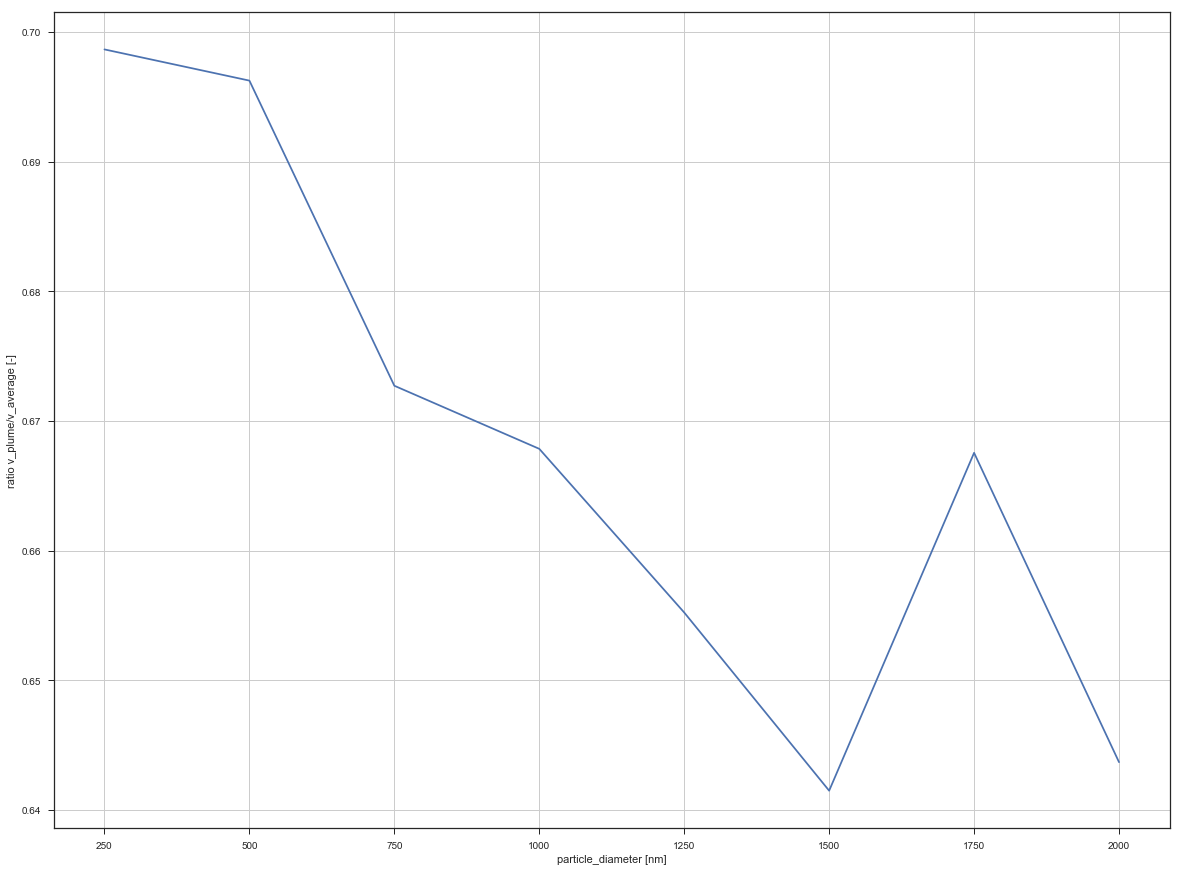

In [11]:
plume_vel=[]
v_ave = 0.0000006*1000*60 #(m/s)(1000mm/1m)(60s/1min) # this velocity is found at the line where the paricles are on
v_ratio = []
for m1 in mom1x:
    slope, intercept, r_value, p_value, std_err = stats.linregress(p.time[:300],m1[:300])
    v_ratio.append(slope/v_ave)
plt.plot(d[:len(mom1x)],v_ratio)
plt.ylabel("ratio v_plume/v_average [-]")
plt.xlabel("particle_diameter [nm]")
plt.grid()

# Moments Order 1

### x-direction

In [12]:
max_ = np.where(p.time==3000)[0][0]
print(max_)

300


### x-direction

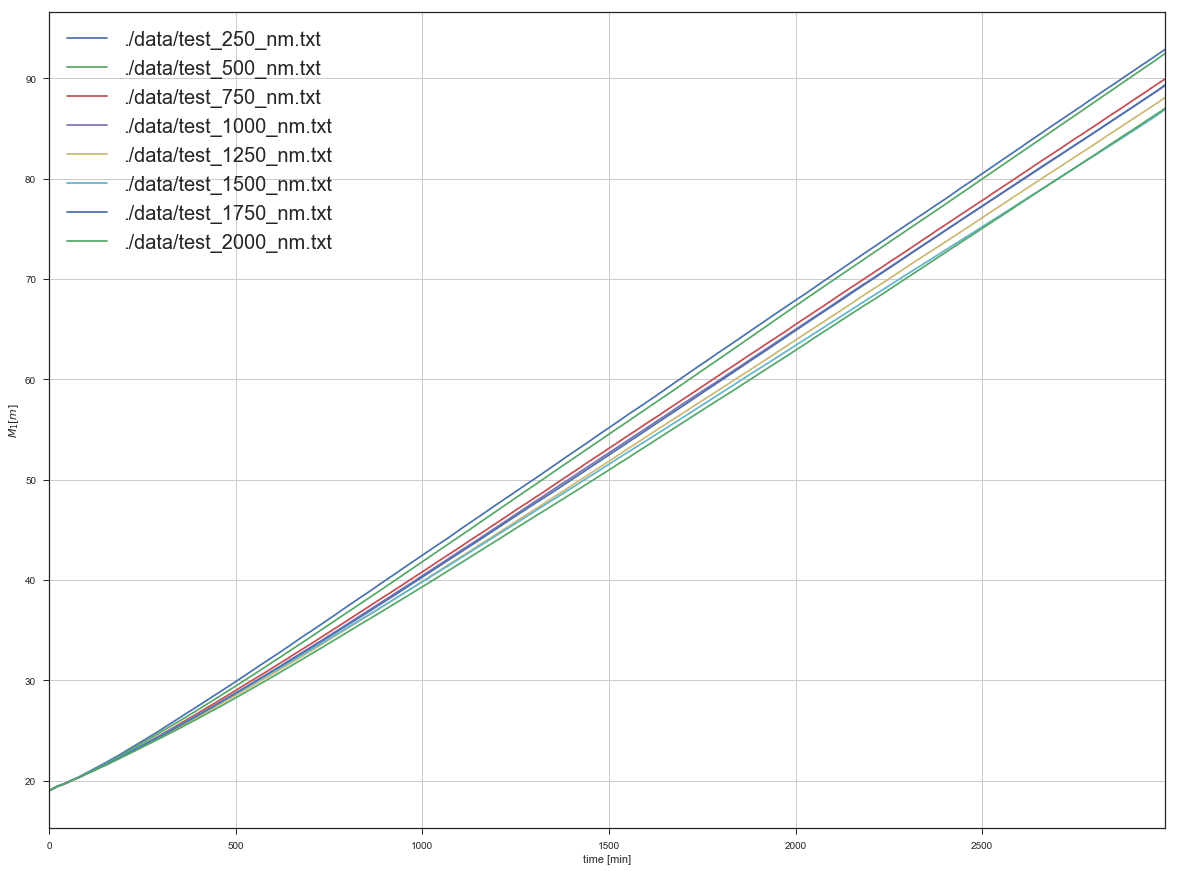

In [13]:
m1x=pd.DataFrame(mom1x[:]).T
m1x.columns = files
m1x.index = p.time
m1x.iloc[:max_].plot()
# m1x[m1x.loc[:,:]<100].plot()
plt.ylabel(r"$M_1 [m]$")
plt.xlabel("time [min]")
plt.grid()
plt.legend(fontsize=20)

### y-direction

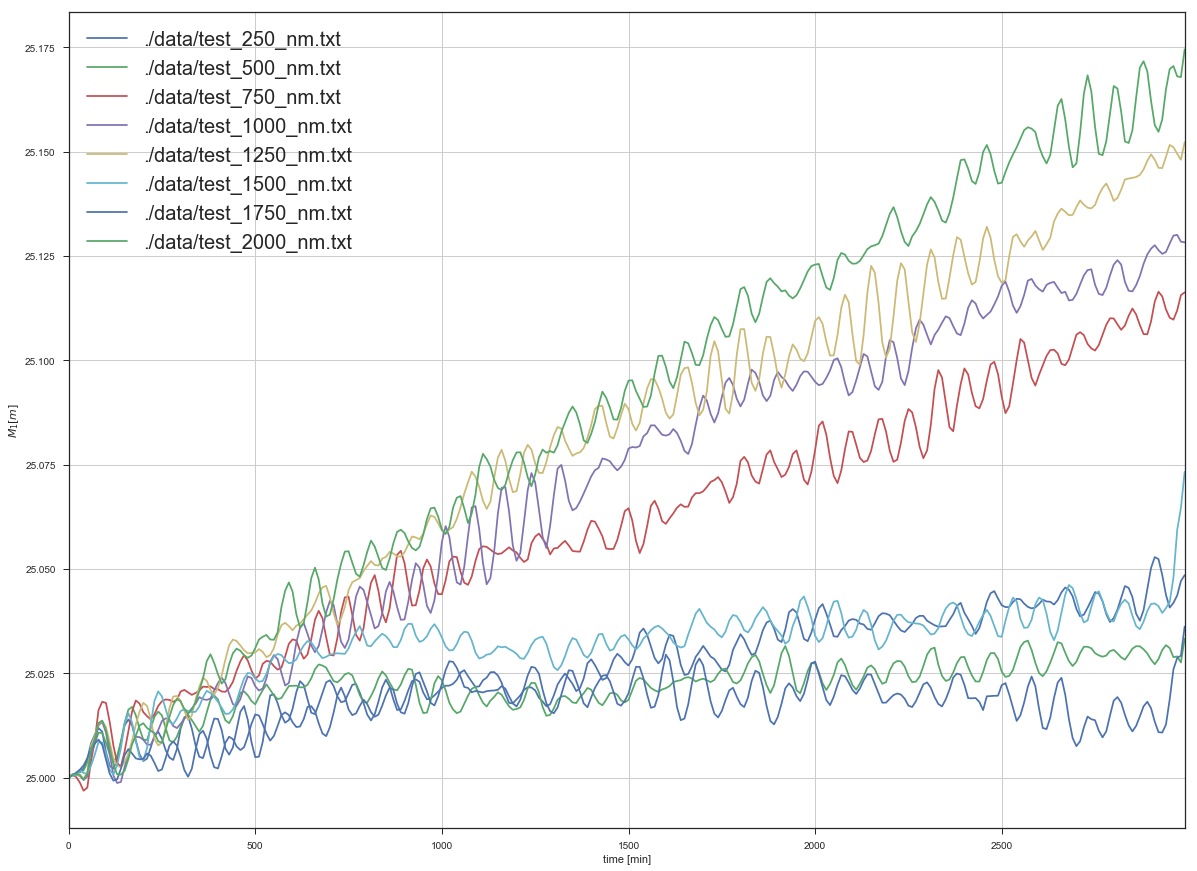

In [14]:
m1y=pd.DataFrame(mom1y[:]).T
m1y.columns = files
m1y.index = p.time
m1y.iloc[:max_].plot()
plt.ylabel(r"$M_1 [m]$")
plt.xlabel("time [min]")
plt.grid()
plt.legend(fontsize=20)

# Moments Order 2

### x-direction

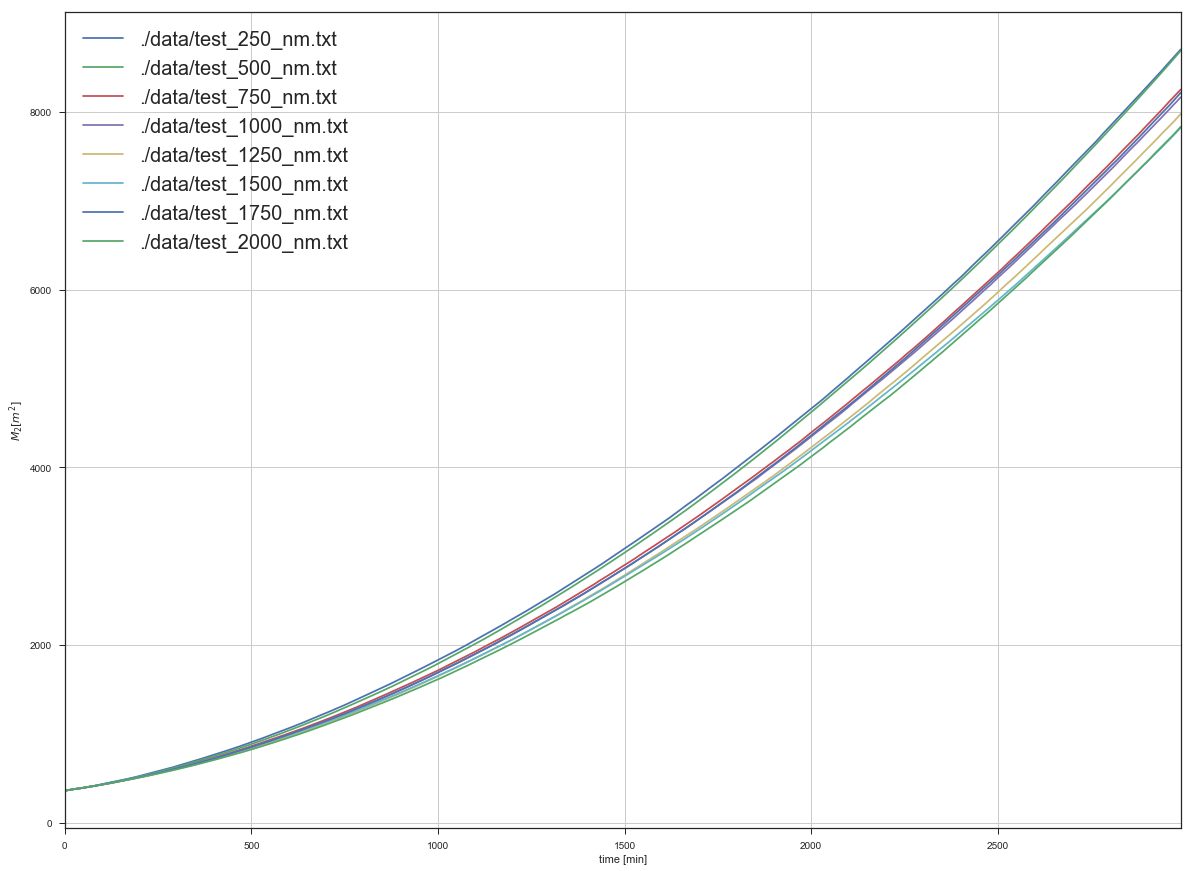

In [15]:
m2x=pd.DataFrame(mom2x[:]).T
m2x.columns = files
m2x.index = p.time
m2x.iloc[:max_].plot()
plt.ylabel(r"$M_2 [m^2]$")
plt.xlabel("time [min]")
plt.grid()
plt.legend(fontsize=20)

### y-direction

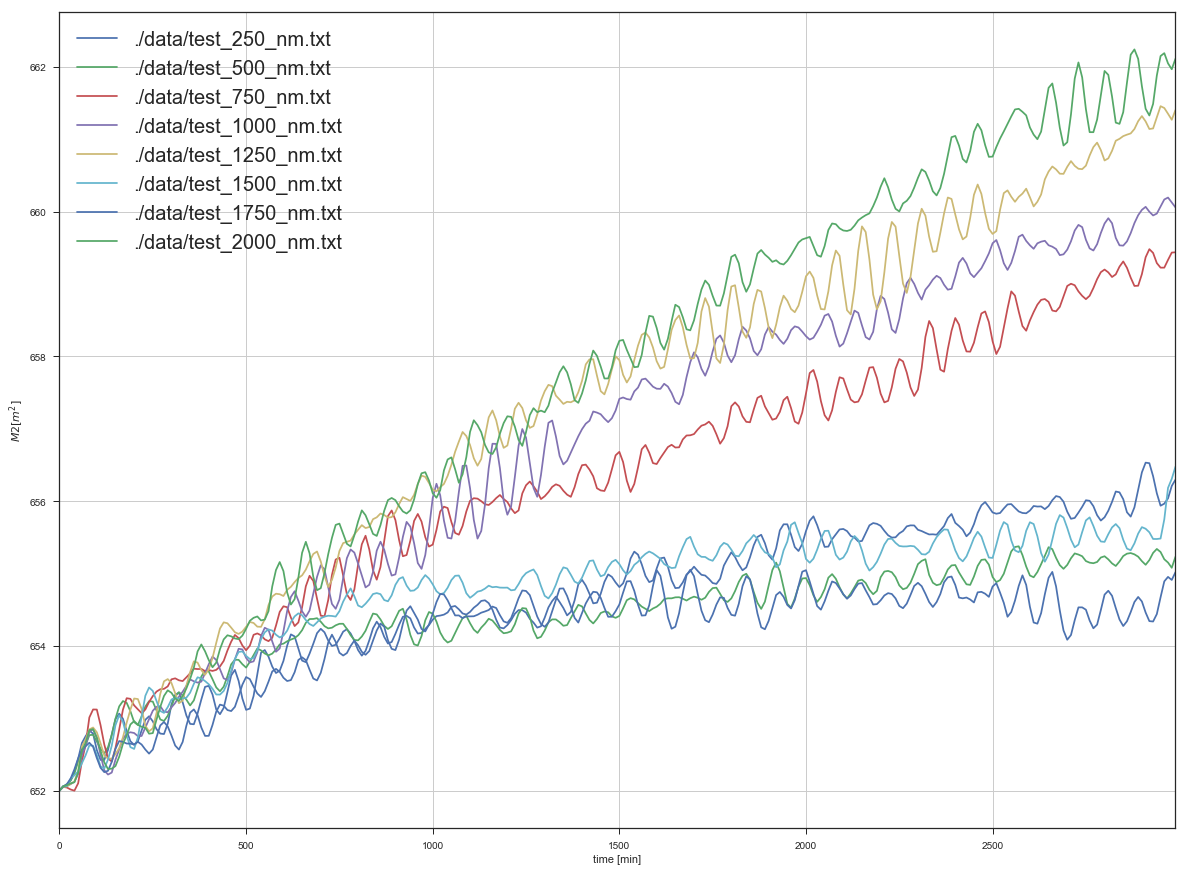

In [16]:
m2y=pd.DataFrame(mom2y[:]).T
m2y.columns = files
m2y.index = p.time
m2y.iloc[:max_].plot()
plt.ylabel(r"$M2 [m^2]$")
plt.xlabel("time [min]")
plt.grid()
plt.legend(fontsize=20)

# SPATIAL VARIANCE

$${σ_x}^2= \frac{{m_2}}{{m_0}} -μ^2  ---where--- (μ = \frac{{m_1}}{{m_0}})$$

In [17]:
sx2 = m2x - m1x**2
sy2 = m2y - m1y**2

In [18]:
max_2 = np.where(p.time==3000)[0][0]
print(max_2)

300


### x-direction

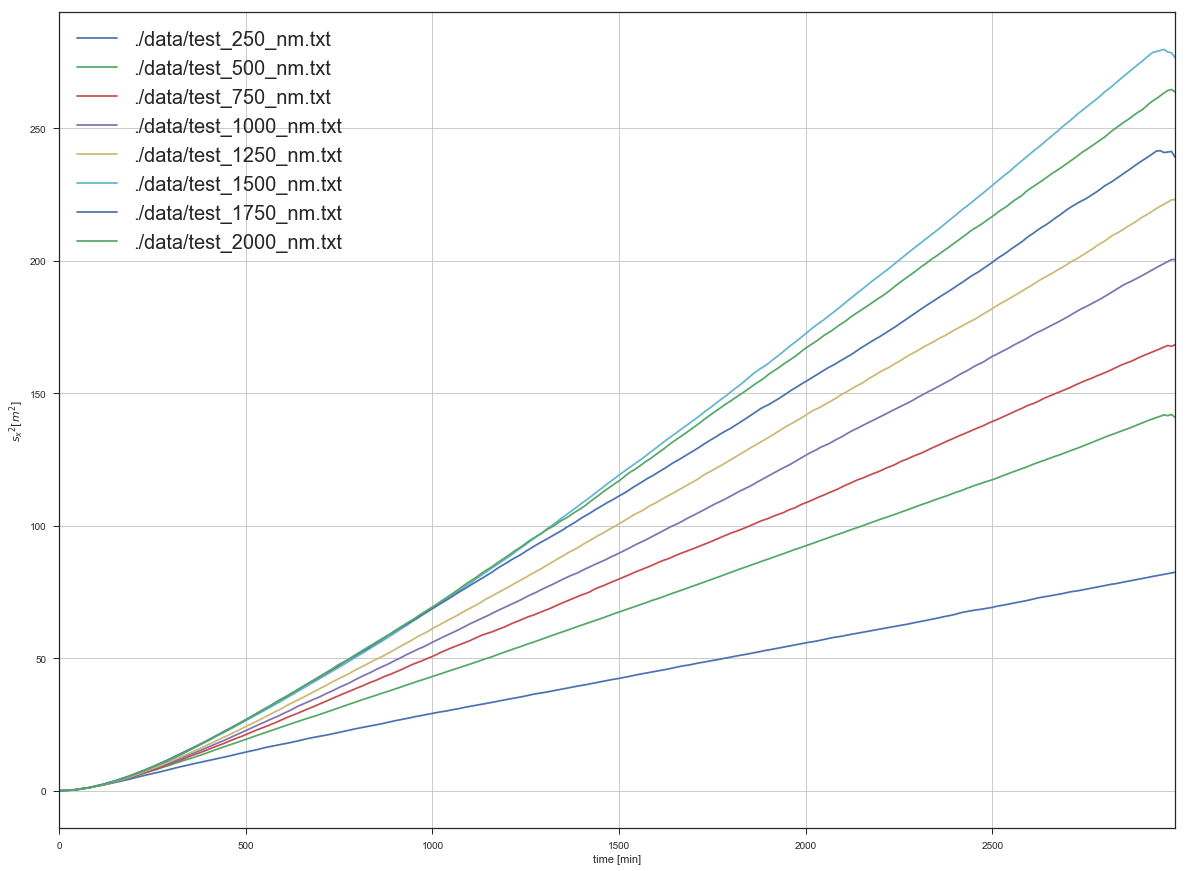

In [30]:
sx2.iloc[:max_2].plot()
plt.ylabel(r"${s_x}^2 [m^2]$")
plt.xlabel("time [min]")
plt.grid()
plt.legend(fontsize=20)

### y-direction

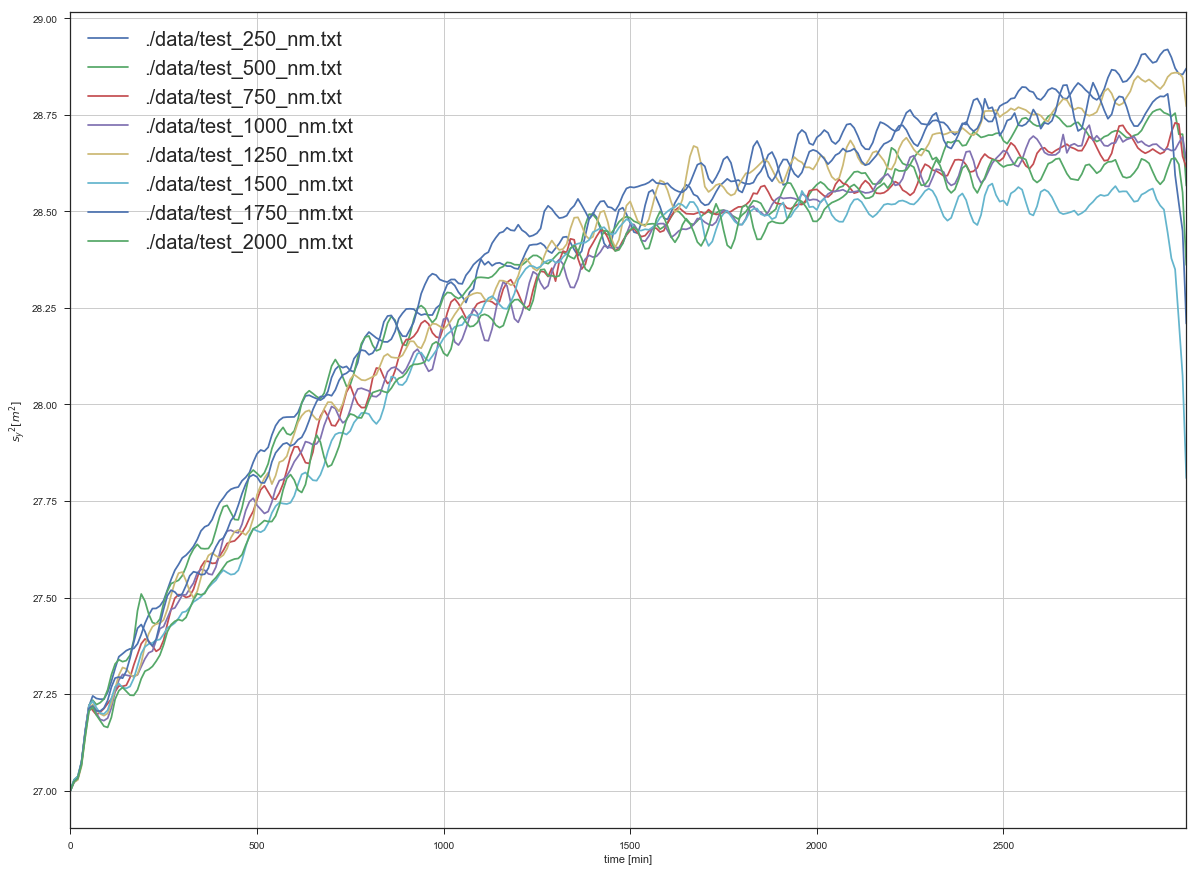

In [21]:
sy2.iloc[:max_2].plot()
plt.ylabel(r"${s_y}^2 [m^2]$")
plt.xlabel("time [min]")
plt.grid()
plt.legend(fontsize=20)

# computing diffusion coeficient

### x-direction

('./data/test_250_nm.txt', 0.027541573888853598, 0.99962579063857726, 0.013770786944426799)
('./data/test_500_nm.txt', 0.048952827701117044, 0.99972489359021444, 0.024476413850558522)
('./data/test_750_nm.txt', 0.058390039670974996, 0.99967605476347998, 0.029195019835487498)
('./data/test_1000_nm.txt', 0.069613633187460236, 0.99890013781696374, 0.034806816593730118)
('./data/test_1250_nm.txt', 0.077959610364800438, 0.99893607085152347, 0.038979805182400219)
('./data/test_1500_nm.txt', 0.099526637819319488, 0.9967350591579266, 0.049763318909659744)
('./data/test_1750_nm.txt', 0.085132076039433041, 0.99910545158896613, 0.042566038019716521)
('./data/test_2000_nm.txt', 0.093430850762576997, 0.99835930934166761, 0.046715425381288499)


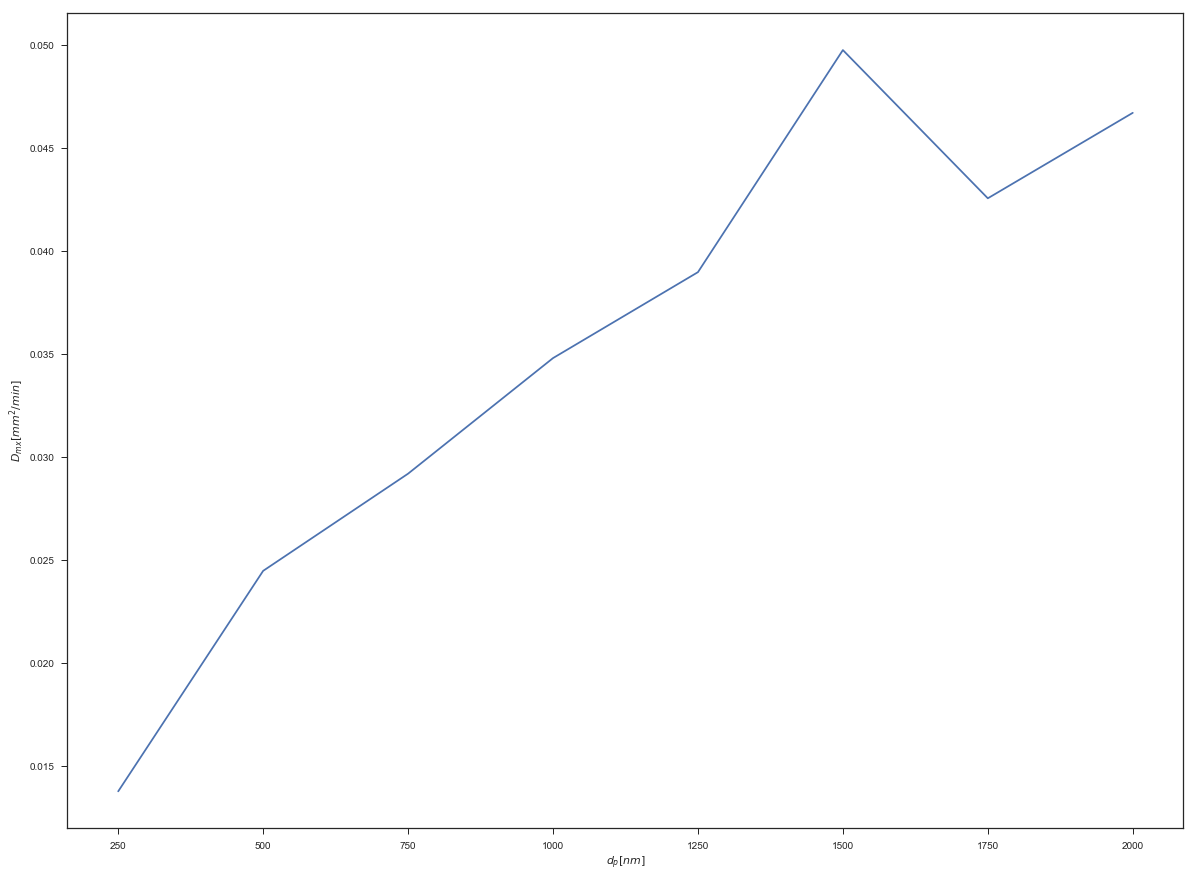

In [81]:
dmx = []
for di in sx2.columns:
    data = sx2[di].iloc[:max_2]
    slope, intercept, r_value, p_value, std_err = stats.linregress(data.index[:300],data.values[:300])
    print(di,slope, r_value, slope/2)
    dmx.append(slope/2)

plt.plot(d,dmx)
plt.ylabel(r"${D_m}_x [{mm^2}/min]$")
plt.xlabel(r"$ d_p [nm]$")

### y-direction

('./data/test_250_nm.txt', 0.00050546311582940102, 0.93648154222210589, 0.00025273155791470051)
('./data/test_500_nm.txt', 0.00045934854308445034, 0.91457034397379366, 0.00022967427154222517)
('./data/test_750_nm.txt', 0.00047154816243244945, 0.9167207302856345, 0.00023577408121622473)
('./data/test_1000_nm.txt', 0.00047698628404030749, 0.92643803165544181, 0.00023849314202015374)
('./data/test_1250_nm.txt', 0.00051664989523724891, 0.93351837208137078, 0.00025832494761862445)
('./data/test_1500_nm.txt', 0.00042721540683378492, 0.86093707749067294, 0.00021360770341689246)
('./data/test_1750_nm.txt', 0.00048416150173459483, 0.89419845615268678, 0.00024208075086729742)
('./data/test_2000_nm.txt', 0.00047240613804806449, 0.912131506656365, 0.00023620306902403225)


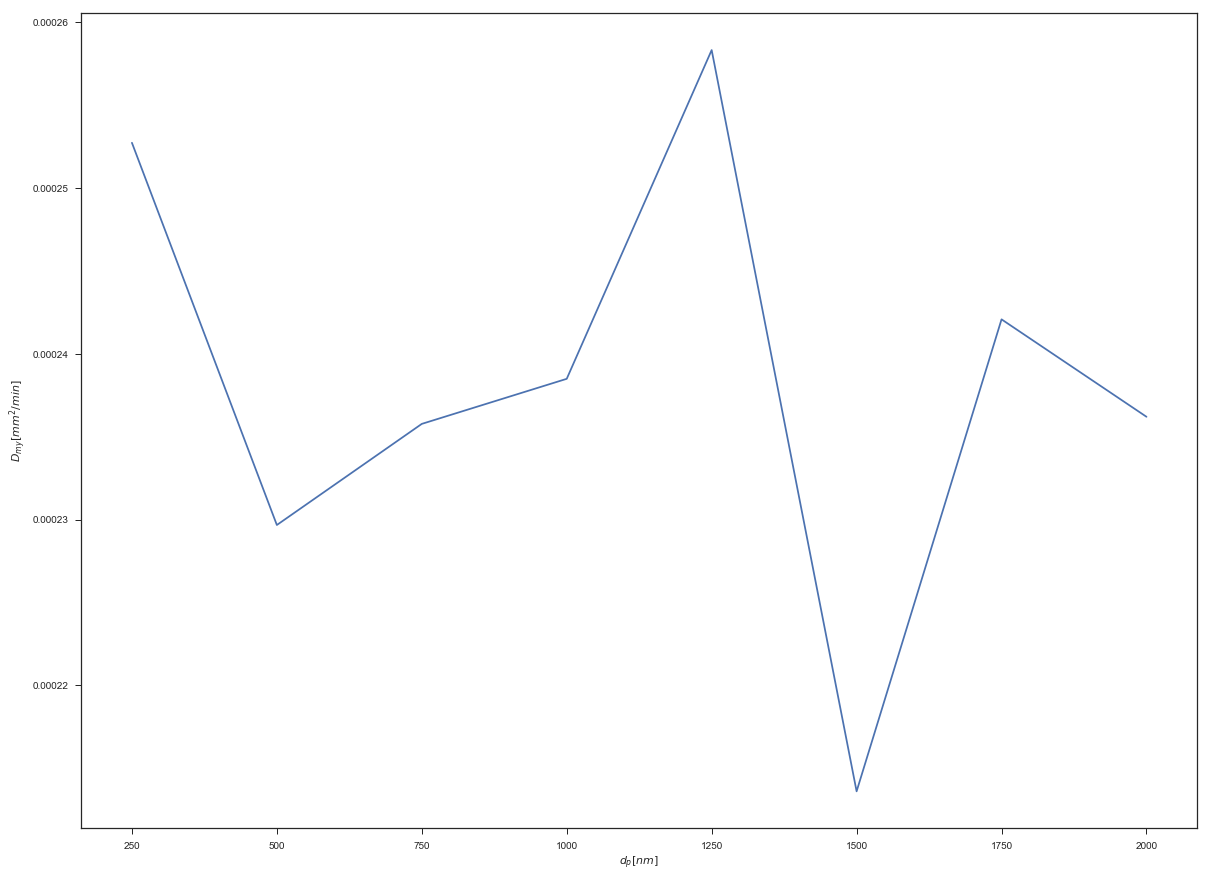

In [87]:
dmy = []
for di in sy2.columns:
    data = sy2[di].iloc[:max_2]
    slope, intercept, r_value, p_value, std_err = stats.linregress(data.index[:300],data.values[:300])
    print(di,slope, r_value, slope/2)
    dmy.append(slope/2)

# slope, intercept, r_value, p_value, std_err = stats.linregress(d,dmy)
# print(r_value)
plt.plot(d,dmy)
plt.ylabel(r"${D_m}_y [{mm^2}/min]$")
plt.xlabel(r"$ d_p [nm]$")

# Dispersivity

### x-direction

In [88]:
v_av =  0.0000006 # m/s still needs to be checked

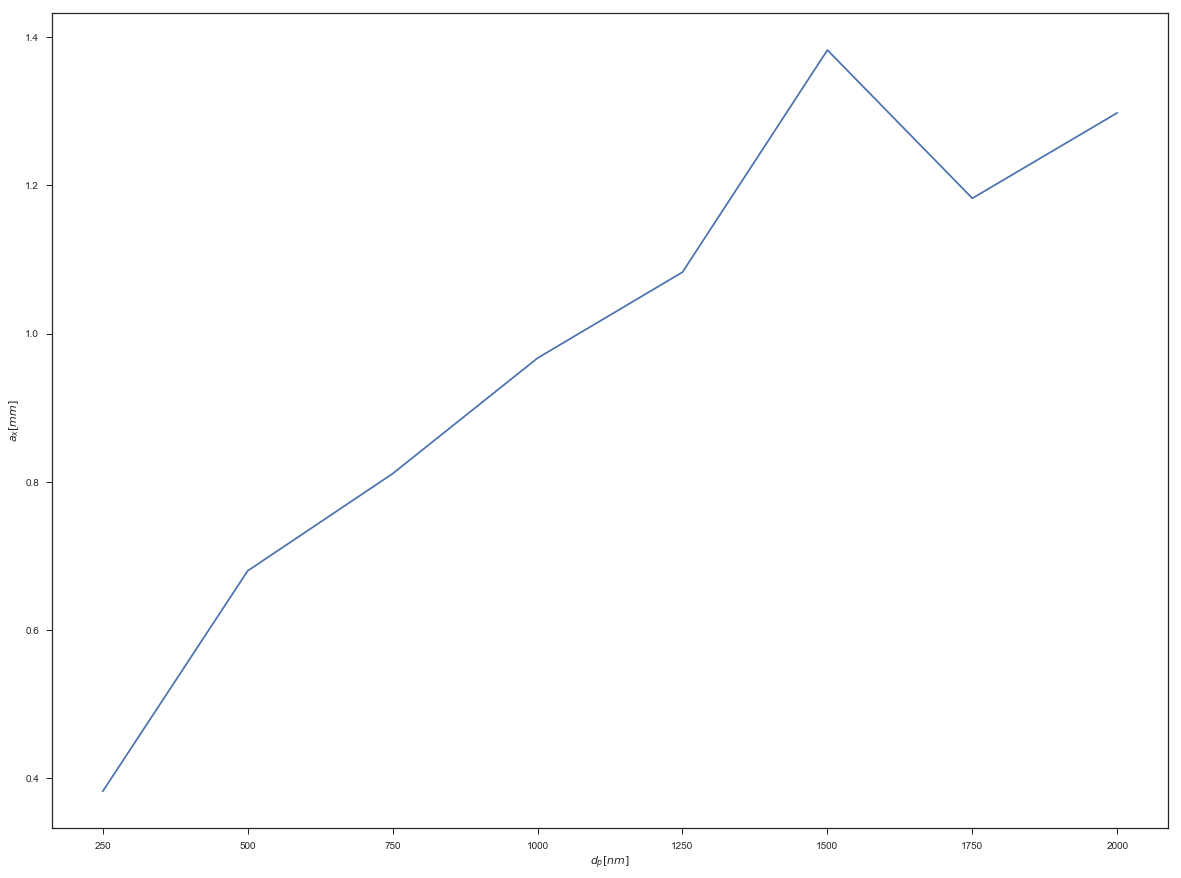

In [90]:
a_x = []
for di in dmx:
    a_x.append(di/v_ave)

plt.plot(d,a_x)
plt.ylabel(r"$a_x [mm]$")
plt.xlabel(r"$ d_p [nm]$")

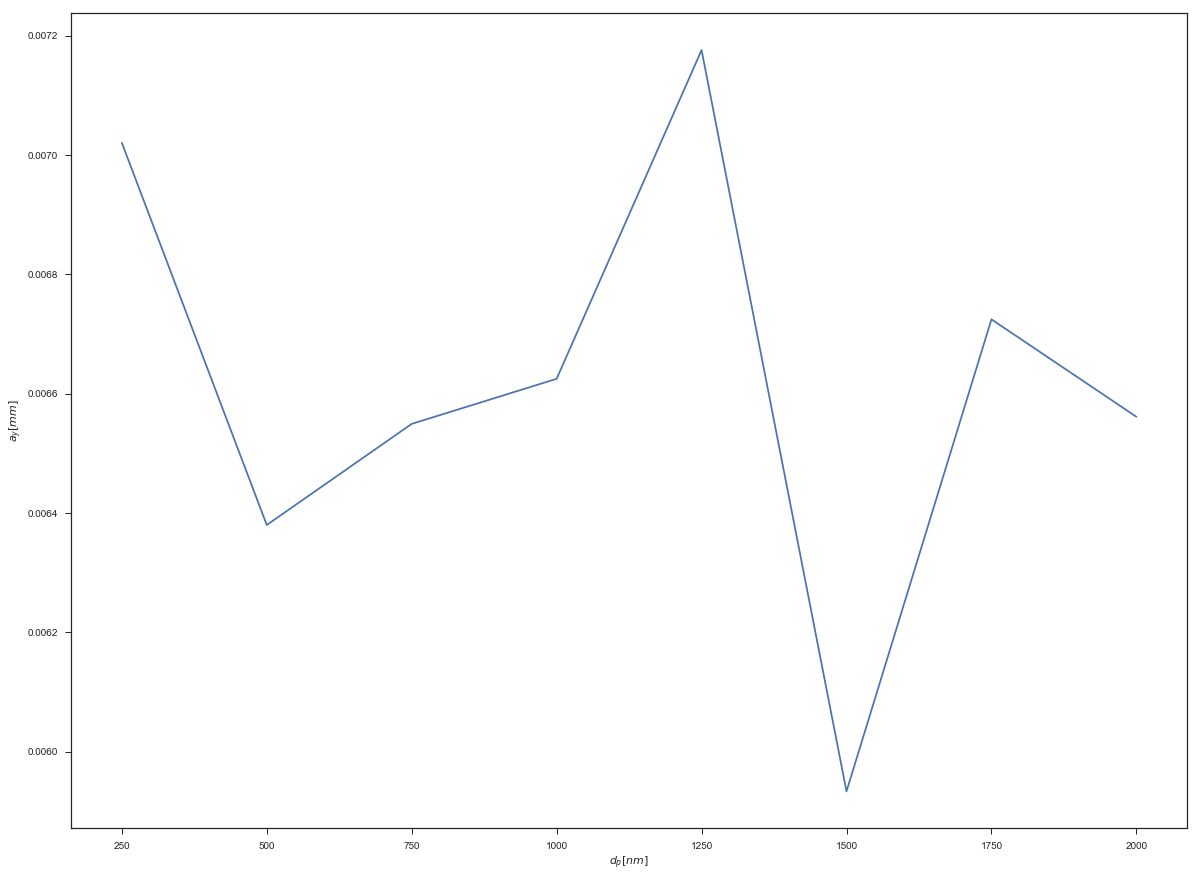

In [91]:
a_y = []
for di in dmy:
    a_y.append(di/v_ave)
plt.plot(d,a_y)
plt.ylabel(r"$a_y [mm]$")
plt.xlabel(r"$ d_p [nm]$")